
# WallStreetBets Meme Stocks Analysis

The users of r/wallstreetbets initiated several short squeezes, pushing the stock prices of some companies up significantly. The companies include GameStop Corp. (GME), AMC Entertainment Holdings, Inc. (AMC), and Bed Bath & Beyond Inc. (BBBY). At the beginnings of the short squeezes, the massive increases of the stock prices attracted more retail investors to join the game, but not everyone could make a profit. 

This report will provide some thoughts for investors who want to gain from next GME and BBBY. I will provide several strategies for achieving profit maximization while managing the risks.

The analysis will mainly focus on history stock prices of GME and AMC.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

##
## The Timing
A quote from one article by Yahoo Finance:

"Stocks with high short interests remain some of the most discussed on the Reddit forum. As hedge funds track Reddit data in real-time to avoid the losses incurred earlier this year, a pattern is beginning to emerge. News publication Business Insider reports that conversations around meme stocks, apart from ones with fervent fan bases, tend to be short-lived and one-time occurrences. In simple words, investors should note that stocks with high short interest only stay popular on the forum for a short time and then lose appeal."

That is to say, our strategies regarding the meme stocks will also be short-term rather long-term. Inspections of the trading volumes of those stocks also support this conclusion.

For each stock, I will decide the start dates of its short squeezes, and then I will extract the two months of trading history before and after the start dates to discover underlying patterns. 

One short squeeze of GME and two shot squeezes of AMC will be analyzed.

In [70]:
GME = yf.Ticker('GME')
AMC = yf.Ticker('AMC')

GME_start_date = '2021-01-13'     # Squeeze 1
AMC_start_date_1 = '2021-01-15'   # Squeeze 2
AMC_start_date_2 = '2021-05-13'   # Squeeze 3

Squeeze1_hist = GME.history(start='2020-11-13', end='2021-03-13')
Squeeze1_hist = Squeeze1_hist[['Close', 'Volume']]

Squeeze2_hist = AMC.history(start='2020-11-15', end='2021-03-15')
Squeeze2_hist = Squeeze2_hist[['Close', 'Volume']]

Squeeze3_hist = AMC.history(start='2021-03-13', end='2021-07-13')
Squeeze3_hist = Squeeze3_hist[['Close', 'Volume']]


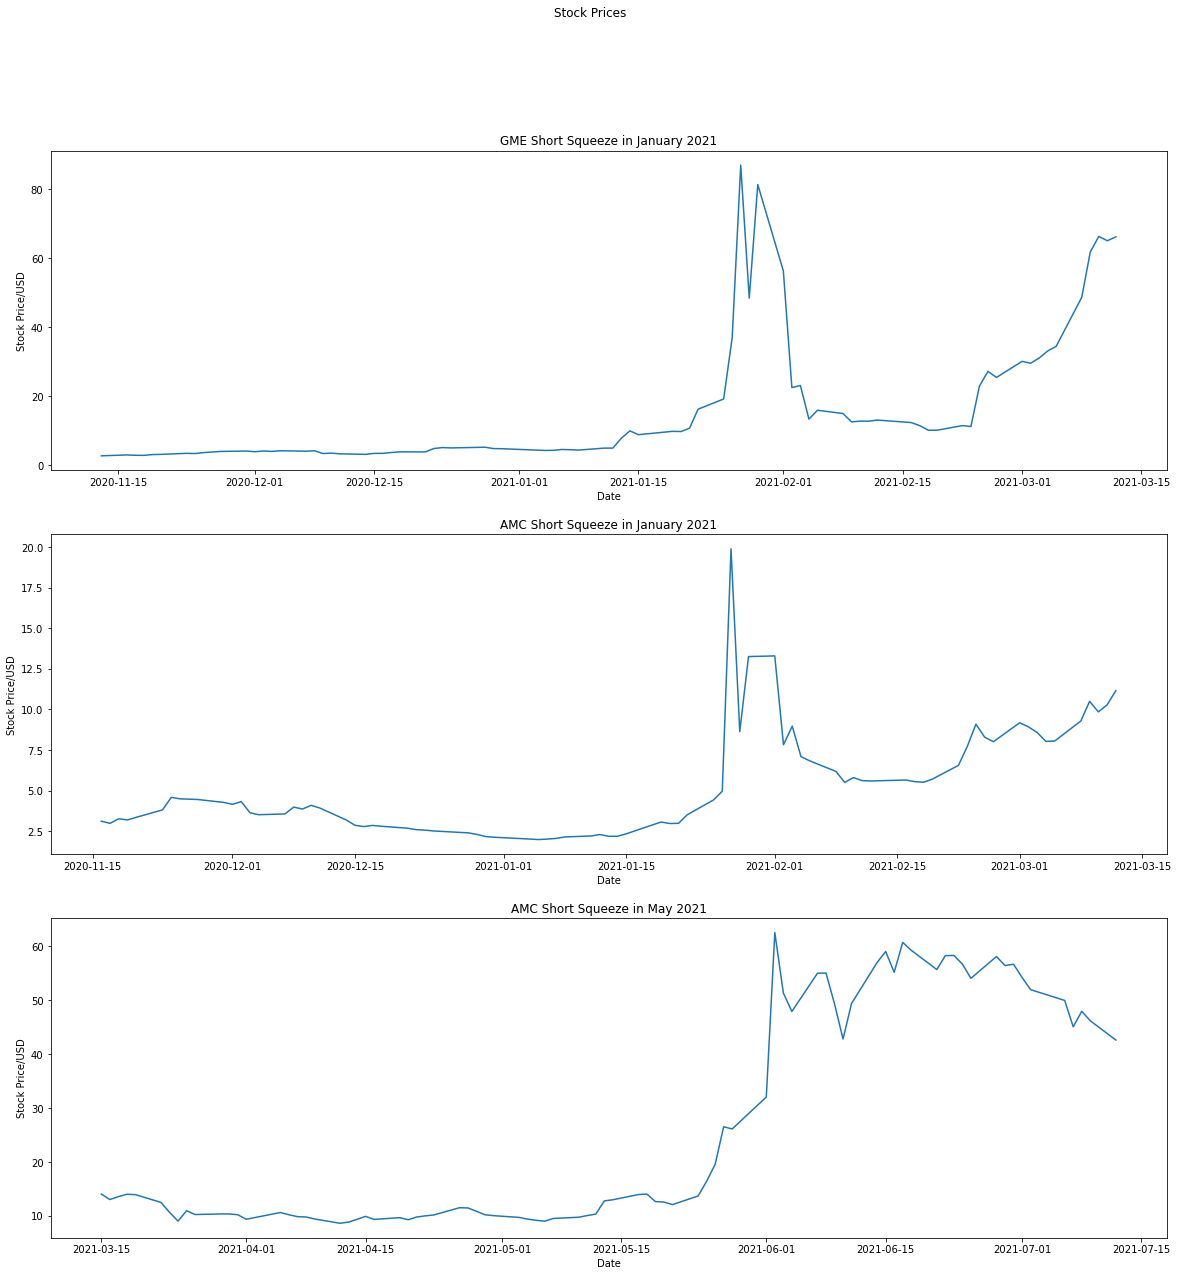

In [71]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1)

fig.set_size_inches(20, 20)

fig.suptitle('Stock Prices')


ax1.plot(Squeeze1_hist.index, Squeeze1_hist.Close)
ax1.set_title('GME Short Squeeze in January 2021')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price/USD')

ax2.plot(Squeeze2_hist.index, Squeeze2_hist.Close)
ax2.set_title('AMC Short Squeeze in January 2021')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock Price/USD')

ax3.plot(Squeeze3_hist.index, Squeeze3_hist.Close)
ax3.set_title('AMC Short Squeeze in May 2021')
ax3.set_xlabel('Date')
ax3.set_ylabel('Stock Price/USD')

plt.show()

We can draw some graphs to demonstrate the changes in trading volume caused by short squeezes. 

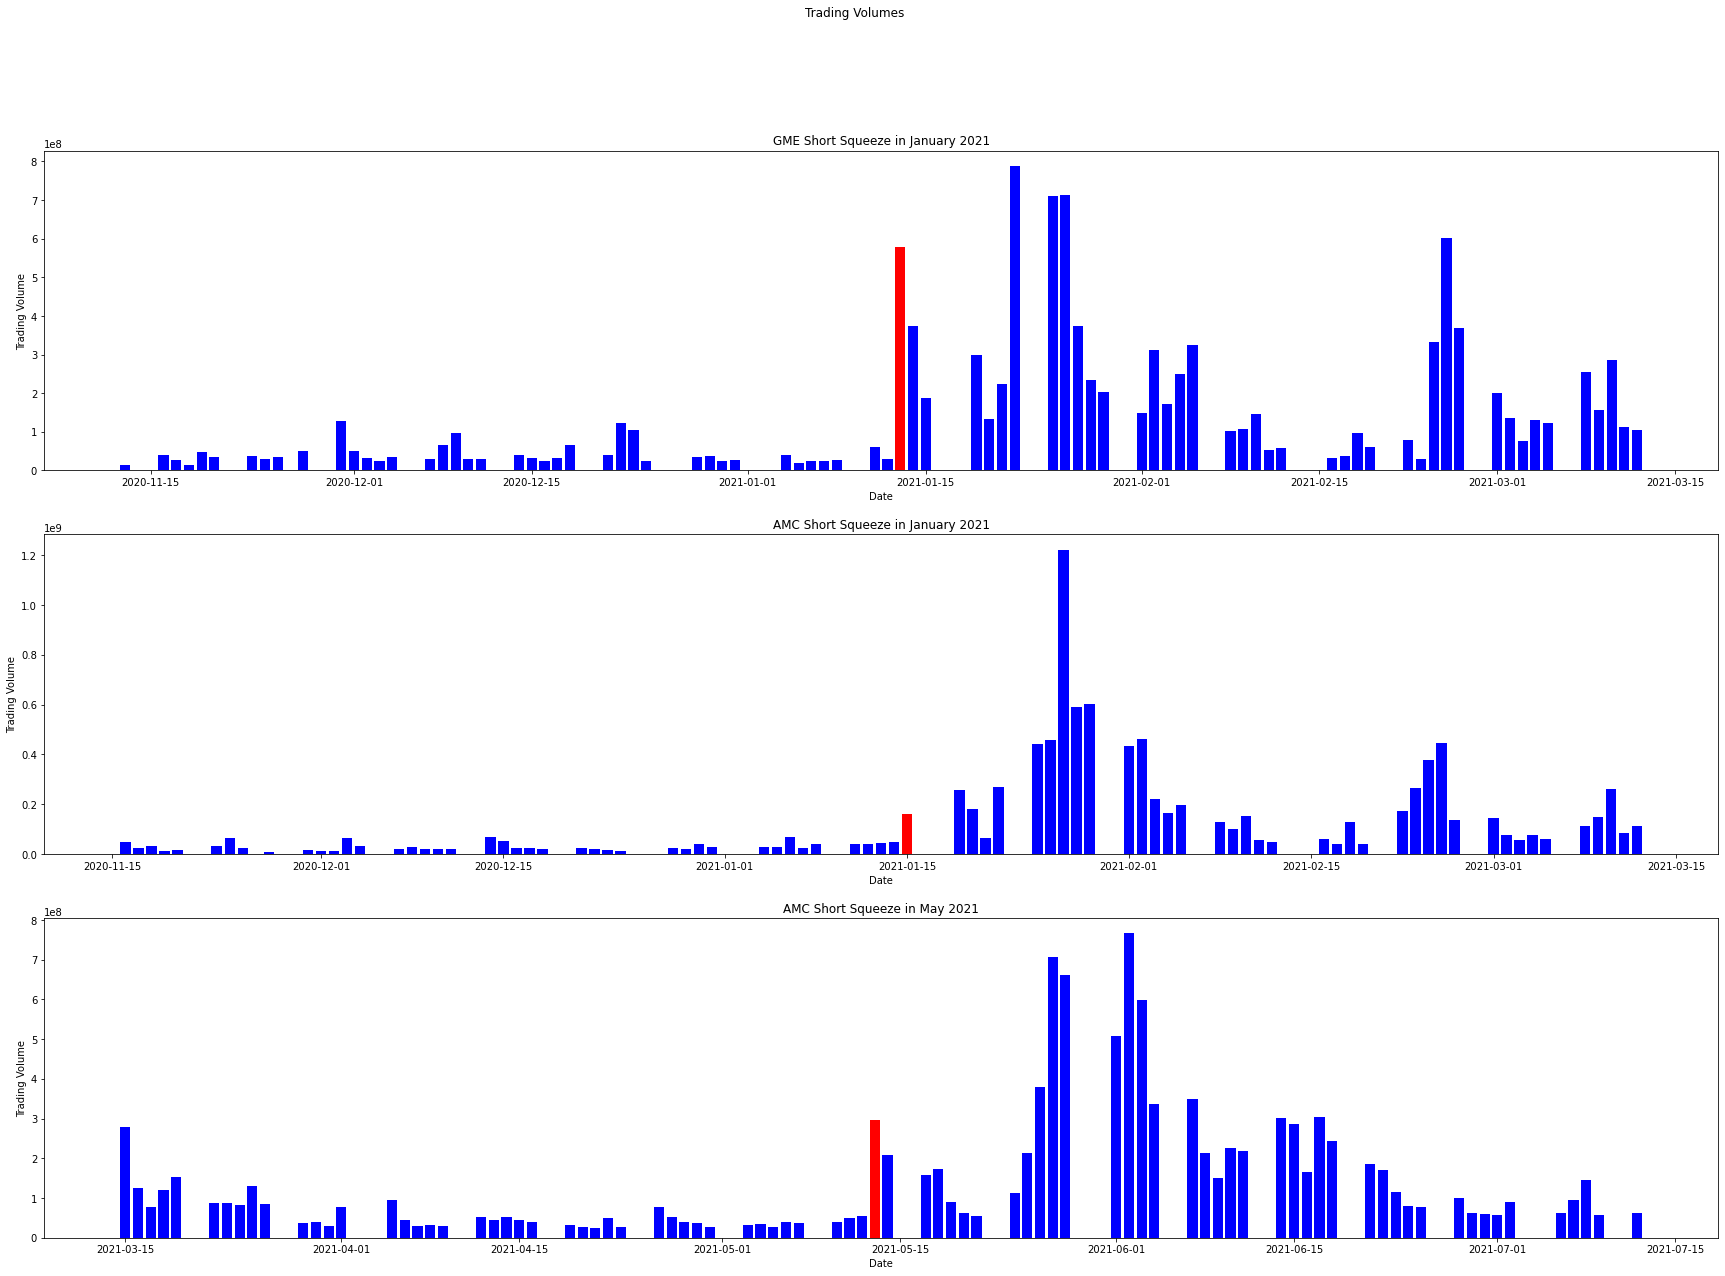

In [72]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1)

fig.set_size_inches(30, 20)

fig.suptitle('Trading Volumes')


colors_1 = ["red" if str(i) == '2021-01-13 00:00:00' else "blue" for i in Squeeze1_hist.index]
ax1.bar(Squeeze1_hist.index, Squeeze1_hist.Volume, color = colors_1)
ax1.set_title('GME Short Squeeze in January 2021')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trading Volume')


colors_2 = ["red" if str(i) == '2021-01-15 00:00:00' else "blue" for i in Squeeze2_hist.index]
ax2.bar(Squeeze2_hist.index, Squeeze2_hist.Volume, color = colors_2)
ax2.set_title('AMC Short Squeeze in January 2021')
ax2.set_xlabel('Date')
ax2.set_ylabel('Trading Volume')

colors_3 = ["red" if str(i) == '2021-05-13 00:00:00' else "blue" for i in Squeeze3_hist.index]
ax3.bar(Squeeze3_hist.index, Squeeze3_hist.Volume, color = colors_3)
ax3.set_title('AMC Short Squeeze in May 2021')
ax3.set_xlabel('Date')
ax3.set_ylabel('Trading Volume')

plt.show()

* The histogram demonstrates that, after the short squeezes were initiated(red bar), the average trading volume increased. Also, the changes of the trading volume were cyclical: the trading volume would gradually increase to a highest point and then decrease. Such pattern would help investors to predict the future volatility of the stocks, which provides opportunities to make profit. 

##
## The Prices

The strategy of making profit is to buy low and sell high. That is, it is necessary to find the bottom prices and peak prices. Entering the market in the wrong time may lead to substantial loss. Therefore, an analysis of the prices of the meme stocks will be a good risk management.

When the users of r/wallstreetbets pushed the stock prices to a extremely high level, some big funds might withdraw their money and cause a price crash. We can analyze the average prices before the short squeezes and the highest prices afterwards to determine how far the retail investors will push the price to.

In [73]:
Squeeze1_hist_before = Squeeze1_hist.iloc[:40,:]
Squeeze1_hist_after = Squeeze1_hist.iloc[40:,:]

Squeeze2_hist_before = Squeeze2_hist.iloc[:41,:]
Squeeze2_hist_after = Squeeze2_hist.iloc[41:,:]

Squeeze3_hist_before = Squeeze3_hist.iloc[:42,:]
Squeeze3_hist_after = Squeeze3_hist.iloc[42:,:]

aver_1 = Squeeze1_hist_before.Close.mean()
high_1 = Squeeze1_hist_after.Close.max()

aver_2 = Squeeze2_hist_before.Close.mean()
high_2 = Squeeze2_hist_after.Close.max()

aver_3 = Squeeze3_hist_before.Close.mean()
high_3 = Squeeze3_hist_after.Close.max()

In [38]:
print('The average price of GME stock before the short squeeze was $' + str(round(aver_1, 3)) + '.')
print('Afterwards the stock price approached the peak level $' + str(round(high_1, 3)) + ', which was approximately ' + str(round(high_1/aver_1)) + ' times as high as its average price before.')

The average price of GME stock before the short squeeze was $3.999.
Afterwards the stock price approached the peak level $86.878, which was approximately 22 times as high as its average price before.


In [39]:
print('The average price of AMC stock before the first short squeeze was $' + str(round(aver_2, 3)) + '.')
print('Afterwards the stock price approached the peak level $' + str(round(high_2, 3)) + ', which was approximately ' + str(round(high_2/aver_2)) + ' times as high as its average price before.')

The average price of AMC stock before the first short squeeze was $3.057.
Afterwards the stock price approached the peak level $19.9, which was approximately 7 times as high as its average price before.


In [40]:
print('The average price of AMC stock before the second short squeeze was $' + str(round(aver_3, 3)) + '.')
print('Afterwards the stock price approached the peak level $' + str(round(high_3, 3)) + ', which was approximately ' + str(round(high_3/aver_3)) + ' times as high as its average price before.')

The average price of AMC stock before the second short squeeze was $10.426.
Afterwards the stock price approached the peak level $62.55, which was approximately 6 times as high as its average price before.


* By inspection, it is noticed that the retail investors of r/wallstreetbets became less crazy about pushing the prices to an extremely high level each time. That is, in the next short squeeze initiated, it will be highly risky to take a long position when the stock price has approached five times as high as the average price before the squeeze. At the same time, taking a short position is well worth considering.

In [74]:
def percentage_change(DataFrame):
    changes = [0]
    for i in range(len(DataFrame) - 1):
        changes.append((DataFrame.Close.iloc[i + 1] - DataFrame.Close.iloc[i]) / DataFrame.Close.iloc[i] * 100)
    DataFrame['Change'] = changes
    
percentage_change(Squeeze1_hist)
percentage_change(Squeeze2_hist)
percentage_change(Squeeze3_hist)

Squeeze1_hist.head()

,Close,Volume,Change
Date,,,
2020-11-13,2.7525,14143600,0.000000
2020-11-16,3.0150,39099200,9.536786
2020-11-17,2.9075,26712800,-3.565508
2020-11-18,2.8925,12676800,-0.515911
2020-11-19,3.1150,47150400,7.692311


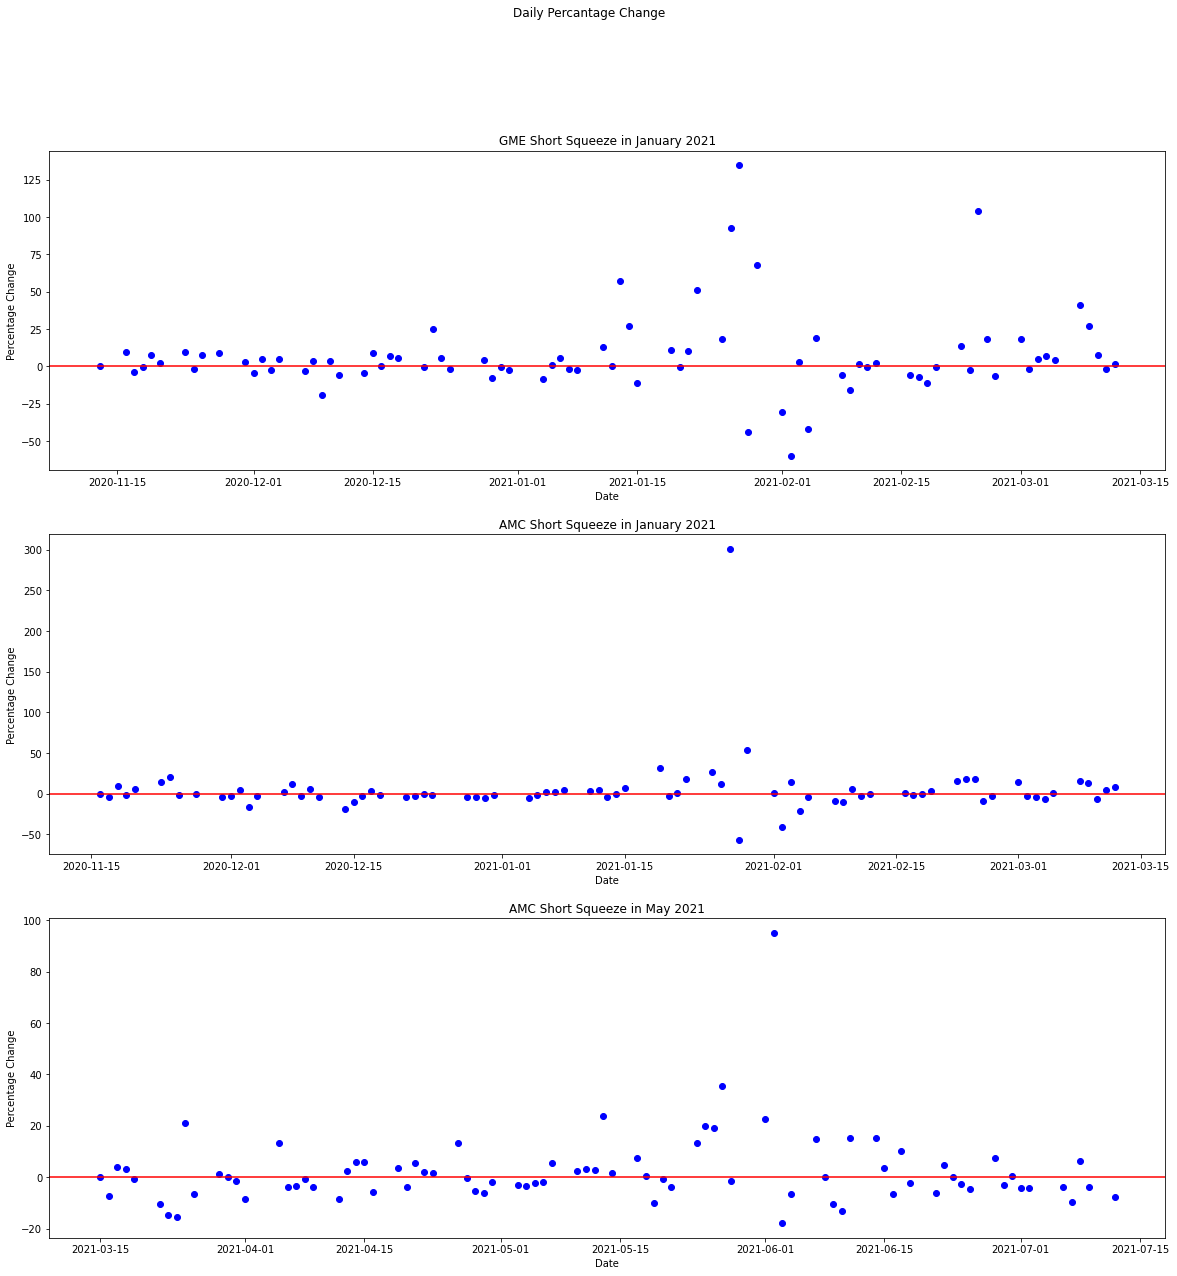

In [78]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1)

fig.set_size_inches(20, 20)

fig.suptitle('Daily Percantage Change')


ax1.scatter(Squeeze1_hist.index, Squeeze1_hist.Change, color='b')
ax1.axhline(y=0, color='r', linestyle = '-')
ax1.set_title('GME Short Squeeze in January 2021')
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')

ax2.scatter(Squeeze2_hist.index, Squeeze2_hist.Change, color='b')
ax2.axhline(y=0, color='r', linestyle = '-')
ax2.set_title('AMC Short Squeeze in January 2021')
ax2.set_xlabel('Date')
ax2.set_ylabel('Percentage Change')

ax3.scatter(Squeeze3_hist.index, Squeeze3_hist.Change, color='b')
ax3.axhline(y=0, color='r', linestyle = '-')
ax3.set_title('AMC Short Squeeze in May 2021')
ax3.set_xlabel('Date')
ax3.set_ylabel('Percentage Change')

plt.show()

* The scatter plots of daily percentage changes indicate that the stock prices bacame extrememly volatile shortly after the short squeeze was initiated. Then the prices would remain volatile in the following three to four weeks, but the volatility would decrease gradually.

##
## The Strategy

After analyzing the timing and the prices in the short squeezes, we can find an optimal stategy to maximize the return while managing the risks. For stocks of high volatility, buying its options will lead to a greater rate of return potentially.

Quote from Investopedia: "Options traders must deal with three shifting parameters that affect the price: the price of the underlying security, time, and volatility. Changes in any or all of these variables affect the option's value". When the price of a stock increases, the price of the call option will increase more aggressively. Also, the meme stocks may also be highly volatile in a short period of time, so the prices of their option will possibly increase substantially without losing too much time value. 

I will use the history option prices of GME to analyze option trading strategies. Data is downloaded from https://www.barchart.com.

### Strike Price

Firstly, I will discuss the optimal strike price to choose when buying a call option of meme stocks. The options chosen have the same expiration time. For now, I will import the data of GME20210212C30000, GME20210212C40000, GME20210212C50000. Assume I used 100,000 dollars to buy those call options on 2021-01-14.

In [60]:
GME20210212C30000 = pd.read_csv('GME20210212C30000.csv')
GME20210212C40000 = pd.read_csv('GME20210212C40000.csv')
GME20210212C50000 = pd.read_csv('GME20210212C50000.csv')

GME20210212C30000 = GME20210212C30000[['Time', 'Open', 'Last']].iloc[::-1].iloc[6:,:]
GME20210212C40000 = GME20210212C40000[['Time', 'Open', 'Last']].iloc[::-1]
GME20210212C50000 = GME20210212C50000[['Time', 'Open', 'Last']].iloc[::-1]

In [61]:
GME20210212C30000.head()

,Time,Open,Last
16,01/14/2021,8.81,12.62
15,01/15/2021,11.00,10.05
14,01/19/2021,12.00,13.58
13,01/20/2021,11.00,10.33
12,01/21/2021,14.30,13.85


In [67]:
investment = 10000

num_30 = investment / GME20210212C30000.Open.iloc[0]
num_40 = investment / GME20210212C40000.Open.iloc[0]
num_50 = investment / GME20210212C50000.Open.iloc[0]

strike_30 = []
strike_40 = []
strike_50 = []

for i in range(17):
    strike_30.append(GME20210212C30000.Last.iloc[i] * num_30)

for i in range(17):
    strike_40.append(GME20210212C40000.Last.iloc[i] * num_40)

for i in range(17):
    strike_50.append(GME20210212C50000.Last.iloc[i] * num_50)

Options_Value = pd.DataFrame(list(zip(strike_30, strike_40, strike_50)), columns = ['Strike_30', 'Strike_40', 'Strike_50'])

In [68]:
Options_Value

,Strike_30,Strike_40,Strike_50
0,14324.631101,9605.263158,12720.930233
1,11407.491487,7868.421053,9302.325581
2,15414.301930,10078.947368,10813.953488
3,11725.312145,8789.473684,9627.906977
4,15720.771850,10592.105263,10930.232558
5,35698.070375,31578.947368,50465.116279
6,58115.777526,57276.315789,83023.255814
7,123779.795687,141447.368421,234302.325581
8,351872.871737,376315.789474,595348.837209
9,413223.609535,278657.894737,477000.000000


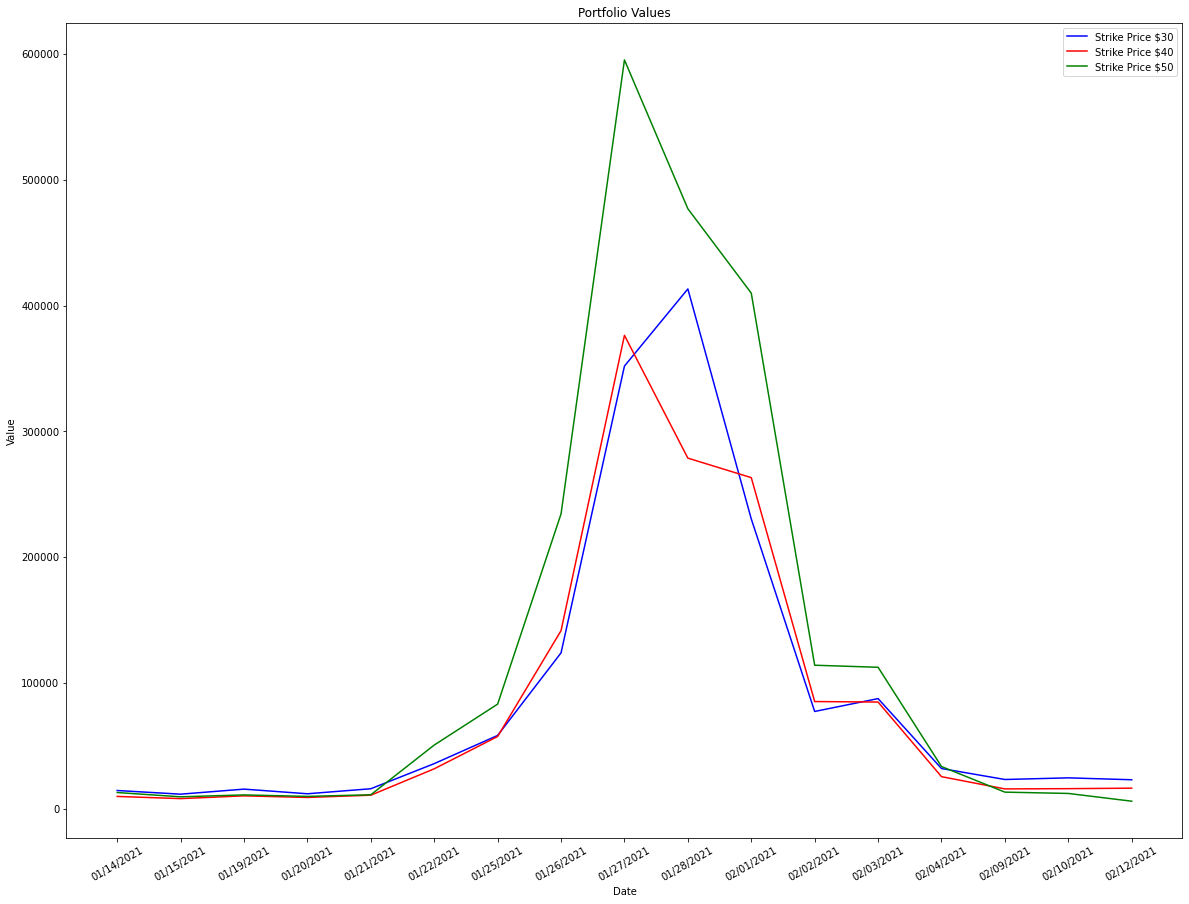

In [69]:
plt.figure(figsize=(20,15))

plt.plot(GME20210212C30000.Time, Options_Value.Strike_30, color='b', label = 'Strike Price $30')
plt.plot(GME20210212C30000.Time, Options_Value.Strike_40, color='r', label = 'Strike Price $40')
plt.plot(GME20210212C30000.Time, Options_Value.Strike_50, color='g', label = 'Strike Price $50')
plt.legend(loc='best')
plt.title('Portfolio Values')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Value')

plt.show()

* When the stock price is increasing, the price of the call option with a higher strike price will increase even more substantially. However, the timing is important, as when the stock price goes down, such call options will lose their values even faster. 
* To synthesize the analysis about the prices of the meme stocks, we could estimate the highest price level the next meme stock could reach. This will prevent choosing a strike price that is too high. Also, the analysis of the timing indicates that short expiring options is worth more considering, as the volatility in prices won't last long. 

##
## Conclusion

After analyzing the the potential patterns of short squeezes, I choose to purchase call options to maximize the profit. The analysis of prices of the meme stocks and the timing of the short squeezes also assist in determining the optimal strike prices and expiry dates.

However, higher returns always comes with higher risks. In the last figure, we can discover that, after we miss the best time to sell the call options, the prices may plummet in a few days. A possible solution is to purchase a put option after the call option has generated a fair amount of profit. Since the prices of the meme stocks are highly unpredictable, and one certain thing is that the stock prices are extremely volatile, the option strategies of buying call options and put options at the same time can help maintain the profit and offset the risks.